In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import numpy as np
plt.style.use('seaborn')

import yfinance as yf



In [3]:


start_date='2010-01-01'
end_date='2023-05-01'
nse_data=yf.download('^NSEI',start=start_date,end=end_date)
nsdaq_data=yf.download('^IXIC',start=start_date,end=end_date)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [6]:
correlation_coefficient = np.corrcoef(nse_data,nsdaq_data)[0, 1]


The correletaion coff. comes out to be 0.9999. Since, the value is close to 1, this means that indices are strongly positive related. 

In [8]:

nse_price=(nse_data.High+nse_data.Low)/2
nsdaq_price=(nsdaq_data.High+nsdaq_data.Low)/2

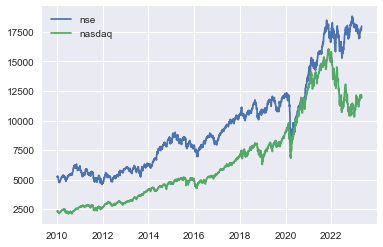

In [9]:
plt.plot(nse_price,label='nse')
plt.plot(nsdaq_price,label='nasdaq')
plt.legend()
plt.show()

nasdaq is a leading index hence is suitable for parameter optimization

Keltner Channel

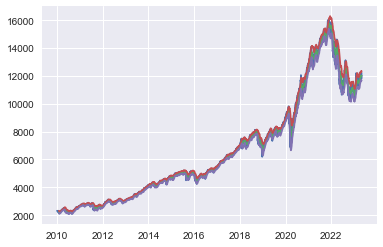

In [10]:
True_range = pd.DataFrame([nsdaq_data.High - nsdaq_data.Low, abs(nsdaq_data.High - nsdaq_data.Close.shift(1)), abs(nsdaq_data.Low - nsdaq_data.Close.shift(1))]).max()
ATR = True_range.rolling(14).mean()
Middle = nsdaq_data['Close'].ewm(span = 20, min_periods = 20).mean()
upper = Middle + 2*ATR
lower = Middle - 2*ATR

plt.plot(nsdaq_data.Close)
plt.plot(Middle)
plt.plot(upper)
plt.plot(lower)

Bollinger Band

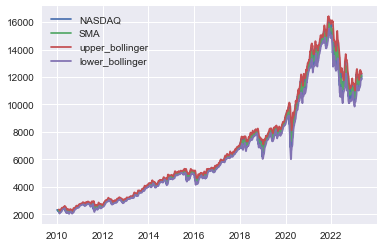

In [11]:
SMA = nsdaq_data.Close.rolling(14).mean()
t_p = (nsdaq_data.High + nsdaq_data.Close + nsdaq_data.Low)/3
sd = t_p.rolling(20).std()
upper_bollinger = SMA + 2*sd
lower_bollinger = SMA - 2*sd

plt.plot(nsdaq_data.Close , label='NASDAQ')  
plt.plot(SMA,label='SMA')
plt.plot(upper_bollinger, label='upper_bollinger')
plt.plot(lower_bollinger, label='lower_bollinger')
plt.legend()

Moving Average Convergance and Divergance

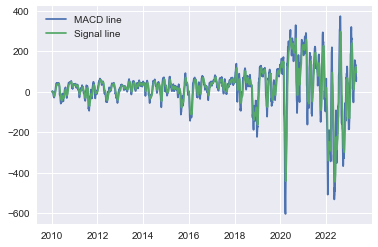

In [12]:
MACD_line = nsdaq_data.Close.ewm(span = 12).mean() - nsdaq_data.Close.ewm(span = 26).mean()
Signal_line = MACD_line.ewm(span = 14).mean()
plt.plot(MACD_line, label='MACD line')
plt.plot(Signal_line, label='Signal line')
plt.legend()

(1.) Keltner Channel Optimization:
To optimize the Keltner Channel, the following parameters are recommended:

The middle line should be based on the Exponential Moving Average (EMA) over a 20-day period.
The average true range (ATR) should be calculated using a 10-day moving average.
Buy signals are generated when the price trend hits the lower line of the Keltner Channel, while sell signals are generated when the price trend hits the upper line.

(2.) Bollinger Bands Optimization:
To optimize the Bollinger Bands indicator, consider the following parameters:

Use a rolling period of 6 months.
Set the smoothing period to 50 days.
Similar to the Keltner Channel, buy and sell signals are generated based on the price reaching the respective lines of the Bollinger Bands. The calculation method differs slightly, as the upper line in Bollinger Bands is based on the standard deviation (SD) rather than the ATR.

(3.) MACD Optimization:
Optimized parameters for the Moving Average Convergence Divergence (MACD) indicator include:

Calculate the MACD line as the difference between the 10-day and 21-day Exponential Moving Averages.
Set the signal line smoothing period to a 20-day EMA.
Buy signals occur when the MACD line crosses above the signal line, while sell signals occur when the signal line crosses above the MACD line.

For MACD

In [15]:
nse_data['macd_line'] = nse_data.Close.ewm(span = 10).mean() - nse_data.Close.ewm(span = 21).mean()
nse_data['signal_line'] = nse_data['macd_line'].ewm(span = 20).mean()

nse_data['Buy_Signal'] = np.where(nse_data['macd_line'] > nse_data['signal_line'], 1, 0)
nse_data['Sell_Signal'] = np.where(nse_data['macd_line'] < nse_data['signal_line'], 1, 0)
nse_data['daily_returns'] =(nse_data['Close']-nse_data['Open'])/nse_data['Open']
nse_data['D_R'] = np.where(nse_data['Buy_Signal'] > nse_data['Sell_Signal'], nse_data['daily_returns'], -nse_data['daily_returns'])
NSE_macd_cumulative_return= (nse_data['D_R'] + 1).product() -1

nse_data['cumulative_rolling_max'] = (nse_data['D_R'] + 1).cumprod()-1
drawdown = NSE_macd_cumulative_return - nse_data['cumulative_rolling_max']
NSE_macd_Max_drawdown = np.min(drawdown)

annual_returns= nse_data['D_R'].mean()*252
risk_free_rate = 0.035
annual_std_dev = nse_data['D_R'].std()*np.sqrt(252)
NSE_macd_Sharpe_ratio=(annual_returns-risk_free_rate) / annual_std_dev

print(NSE_macd_Max_drawdown)
print(NSE_macd_cumulative_return)
print(NSE_macd_Sharpe_ratio)

-0.02940959158498302
21.34962605310097
1.4850501144419215


Keltner Channel

In [19]:
print(nse_data.columns)

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'ATR'], dtype='object')


In [20]:
#nse_data.drop(['Buy_Signal', 'Sell_Signal','macd_line', 'signal_line','daily_returns', 'D_R','cumulative_rolling_max'], axis=1, inplace = True)

True_range = pd.DataFrame([nse_data.High - nse_data.Low, abs(nse_data.High - nse_data.Close.shift(1)), abs(nse_data.Low - nse_data.Close.shift(1))]).max()
nse_data['ATR'] = True_range.rolling(18).mean()
nse_data['Middle'] =nse_data['Close'].ewm(span = 20, min_periods = 20).mean()
nse_data['upper'] = Middle + 2*ATR
nse_data['lower'] = Middle - 2*ATR


nse_data['Buy_Signal'] = np.where(nse_data['Close'] < nse_data['lower'], 1, 0)
nse_data['Sell_Signal'] = np.where(nse_data['Close'] > nse_data['upper'], 1, 0)
nse_data['daily_returns'] =(nse_data['Close']-nse_data['Open'])/nse_data['Open']
nse_data['D_R'] = np.where(nse_data['Buy_Signal'] > nse_data['Sell_Signal'], nse_data['daily_returns'], -nse_data['daily_returns'])
NSE_kc_cumulative_return= (nse_data['D_R'] + 1).product() -1

nse_data['cumulative_rolling_max'] = (nse_data['D_R'] + 1).cumprod()-1
drawdown = NSE_kc_cumulative_return - nse_data['cumulative_rolling_max']
NSE_kc_Max_drawdown = np.min(drawdown)

annual_returns= nse_data['D_R'].mean()*252
risk_free_rate = 0.035
annual_std_dev = nse_data['D_R'].std()*np.sqrt(252)
NSE_kc_Sharpe_ratio=(annual_returns-risk_free_rate) / annual_std_dev

print(NSE_kc_Max_drawdown)
print(NSE_kc_cumulative_return)
print(NSE_kc_Sharpe_ratio)

-0.23109749917520617
7.134434543691238
0.9443253850361931


Bollinger Bands

In [23]:
#nse_data.drop(['Buy_Signal', 'Sell_Signal','ATR', 'D_R','upper', 'lower','Middle','daily_returns','cumulative_rolling_max'], axis=1, inplace = True)

nse_data['SMA'] = nse_data.Close.rolling(180).mean()
nse_data['t_p'] = (nse_data.Close + nse_data.High + nse_data.Low)/3
sd = nse_data.t_p.rolling(50).std()
nse_data['upper_bollinger'] = nse_data.SMA + 2*sd
nse_data['lower_bollinger'] = nse_data.SMA - 2*sd
nse_data['Buy_Signal'] = np.where(nse_data['Close'] < nse_data['lower_bollinger'], 1, 0)
nse_data['Sell_Signal'] = np.where(nse_data['Close'] > nse_data['upper_bollinger'], 1, 0)
nse_data['daily_returns'] =(nse_data['Close']-nse_data['Open'])/nse_data['Open']
nse_data['D_R'] = np.where(nse_data['Buy_Signal'] > nse_data['Sell_Signal'], nse_data['daily_returns'], -nse_data['daily_returns'])
NSE_bb_cumulative_return= (nse_data['D_R'] + 1).product() -1

nse_data['cumulative_rolling_max'] = (nse_data['D_R'] + 1).cumprod()-1
drawdown = NSE_bb_cumulative_return - nse_data['cumulative_rolling_max']
NSE_bb_Max_drawdown = np.min(drawdown)

annual_returns= nse_data['D_R'].mean()*252
risk_free_rate = 0.035
annual_std_dev = nse_data['D_R'].std()*np.sqrt(252)
NSE_bb_Sharpe_ratio=(annual_returns-risk_free_rate) / annual_std_dev

print(NSE_bb_Max_drawdown)
print(NSE_bb_cumulative_return)
print(NSE_bb_Sharpe_ratio)

-0.08756292972545943
0.22464272381090056
-0.060107069951417035
